## Pre-Processing and Visualising ERA5

Import packages

In [1]:
from minisom import MiniSom
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
import dask
from ncar_jobqueue import NCARCluster

In [2]:
firstlat = 15
secondlat = 60
firstlon = -130+360
secondlon = -60+360

Initializing Cluster

In [3]:
cluster = NCARCluster(project='NASP0013', memory="109GB")

In [4]:
cluster

PBSCluster(4002ae9e, 'tcp://10.12.206.65:33306', workers=0, threads=0, memory=0 B)

In [5]:
from dask.distributed import Client

In [6]:
client = Client(cluster)

In [7]:
client

Client Scheduler: tcp://10.12.206.65:33306 Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/kiarar/proxy/8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [8]:
cluster.adapt(minimum=5, maximum=60)

### VAR_2T 1979-2021 Data

In [9]:
data = '/gpfs/fs1/collections/rda/data/ds633.0/e5.oper.an.sfc/*/e5.oper.an.sfc.128_167_2t.ll025sc.*.nc'

In [10]:
ds = xr.open_mfdataset(data, parallel=True)

In [11]:
ds = ds.where((ds["longitude"]>=firstlon)&(ds["longitude"]<=secondlon)&(ds["latitude"]>=firstlat)&(ds["latitude"]<=secondlat),drop=True)

/glade/u/home/kiarar/.conda/envs/python_tutorial/lib/python3.9/site-packages/xarray/core/indexing.py:1387: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]


In [12]:
ds["VAR_2T"]

<xarray.DataArray 'VAR_2T' (time: 370344, latitude: 181, longitude: 281)>
dask.array<where, shape=(370344, 181, 281), dtype=float32, chunksize=(744, 181, 281), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 60.0 59.75 59.5 59.25 ... 15.5 15.25 15.0
  * longitude  (longitude) float64 230.0 230.2 230.5 230.8 ... 299.5 299.8 300.0
  * time       (time) datetime64[ns] 1979-01-01 ... 2021-03-31T23:00:00
Attributes: (12/14)
    long_name:                     2 metre temperature
    short_name:                    2t
    units:                         K
    original_format:               WMO GRIB 1 with ECMWF local table
    ecmwf_local_table:             128
    ecmwf_parameter:               167
    ...                            ...
    grid_specification:            0.25 degree x 0.25 degree from 90N to 90S ...
    rda_dataset:                   ds633.0
    rda_dataset_url:               https:/rda.ucar.edu/datasets/ds633.0/
    rda_dataset_doi:               DOI: 10.5065/BH6N-5N20
    rda_dataset_group:             ERA5 atmospheric surface analysis [netCDF4]
    number_of_significant_digits:  7

Resampling to monthly frequency and compute with Dask

In [13]:
# Monthly Mean
dsmonthly = ds.resample(time='MS').mean(skipna=True).compute()

In [14]:
#dsmonthly = ds.resample(time='MS').mean(skipna=True)
# to resample data to montly means

In [15]:
dsmonthly

<xarray.Dataset>
Dimensions:    (latitude: 181, longitude: 281, time: 507)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-03-01
  * latitude   (latitude) float64 60.0 59.75 59.5 59.25 ... 15.5 15.25 15.0
  * longitude  (longitude) float64 230.0 230.2 230.5 230.8 ... 299.5 299.8 300.0
Data variables:
    VAR_2T     (time, latitude, longitude) float32 249.6 248.3 ... 298.4 298.4
    utc_date   (time, longitude, latitude) float64 1.979e+09 ... 2.021e+09

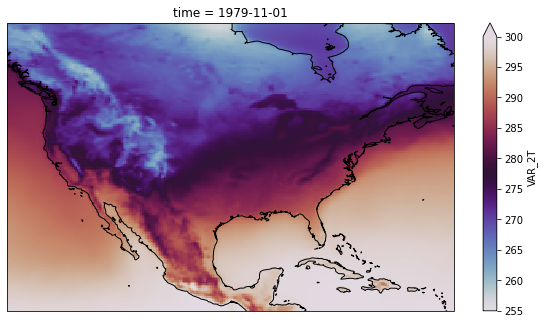

In [16]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)
ax = plt.axes([0., 0., 1., 1.], projection=ccrs.PlateCarree())
p = dsmonthly["VAR_2T"].isel(time=10).plot(ax = ax, cmap="twilight", vmin=255, vmax=300, transform=ccrs.PlateCarree())
ax.coastlines()
ax.margins(x=0, y=0)
plt.show()

In [17]:
dsmonthly.to_netcdf("/glade/scratch/kiarar/ERA5_2T_1979_2021.nc")

In [18]:
dsmonthly=None
ds=None

### VAR_2T 1950-1978 Data

In [9]:
data2 = '/gpfs/fs1/collections/rda/data/ds633.4/e5p.oper.an.sfc/*/e5p.oper.an.sfc.128_167_2t.ll025sc.*.nc'

In [10]:
ds2 = xr.open_mfdataset(data2, parallel=True)

In [11]:
ds2 = ds2.where((ds2["longitude"]>=firstlon)&(ds2["longitude"]<=secondlon)&(ds2["latitude"]>=firstlat)&(ds2["latitude"]<=secondlat),drop=True)

/glade/u/home/kiarar/.conda/envs/python_tutorial/lib/python3.9/site-packages/xarray/core/indexing.py:1387: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]


In [12]:
ds2["VAR_2T"]

<xarray.DataArray 'VAR_2T' (time: 254208, latitude: 181, longitude: 281)>
dask.array<where, shape=(254208, 181, 281), dtype=float32, chunksize=(744, 181, 281), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 60.0 59.75 59.5 59.25 ... 15.5 15.25 15.0
  * longitude  (longitude) float64 230.0 230.2 230.5 230.8 ... 299.5 299.8 300.0
  * time       (time) datetime64[ns] 1950-01-01 ... 1978-12-31T23:00:00
Attributes: (12/18)
    long_name:                     2 metre temperature
    short_name:                    2t
    units:                         K
    original_format:               WMO GRIB 1 with ECMWF local table
    ecmwf_local_table:             128
    ecmwf_parameter:               167
    ...                            ...
    grid_specification:            0.25 degree x 0.25 degree from 90N to 90S ...
    rda_dataset:                   ds633.4
    rda_dataset_url:               https:/rda.ucar.edu/datasets/ds633.4/
    rda_dataset_doi:               DOI: 10.5065/YBW7-YG52
    rda_dataset_group:             ERA5 1950-1978 Preliminary atmospheric sur...
    number_of_significant_digits:  7

In [13]:
# Monthly Mean
ds2monthly = ds2.resample(time='MS').mean(skipna=True).compute()

distributed.scheduler - ERROR - Couldn't gather keys {"('concatenate-2522ec4b1554561b01aafadf1868c571', 165, 0, 0)": []} state: ['waiting'] workers: []
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: [], ('concatenate-2522ec4b1554561b01aafadf1868c571', 165, 0, 0)
NoneType: None


In [14]:
ds2monthly

<xarray.Dataset>
Dimensions:    (latitude: 181, longitude: 281, time: 348)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01 1950-02-01 ... 1978-12-01
  * latitude   (latitude) float64 60.0 59.75 59.5 59.25 ... 15.5 15.25 15.0
  * longitude  (longitude) float64 230.0 230.2 230.5 230.8 ... 299.5 299.8 300.0
Data variables:
    VAR_2T     (time, latitude, longitude) float32 244.9 244.9 ... 298.8 298.8
    utc_date   (time, longitude, latitude) float64 1.95e+09 ... 1.978e+09

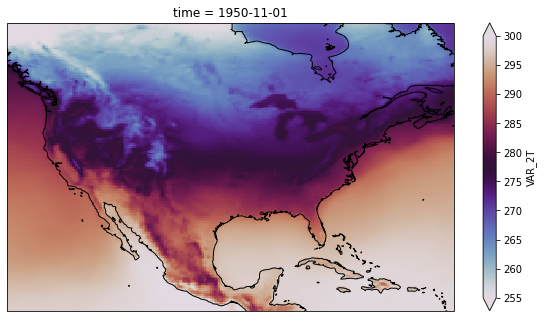

In [15]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)
ax = plt.axes([0., 0., 1., 1.], projection=ccrs.PlateCarree())
p = ds2monthly["VAR_2T"].isel(time=10).plot(ax = ax, cmap="twilight",vmin=255, vmax=300, transform=ccrs.PlateCarree())
ax.coastlines()
ax.margins(x=0, y=0)
plt.show()

In [16]:
ds2monthly.to_netcdf("/glade/scratch/kiarar/ERA5_2T_1950_1978.nc")

In [17]:
ds2monthly=None
ds2=None

In [18]:
ds2monthly

### U Winds (200 hPa) 1979-2018 Data 

In [48]:
# Change year as needed until completed
#year_value = 1988

In [49]:
#def grabdata(ds):
    #return ds.where((ds["longitude"]>=firstlon)&(ds["longitude"]<=secondlon)&(ds["latitude"]>=firstlat)&(ds["latitude"]<=secondlat),drop=True).sel(level=200)

In [18]:
data3 = '/gpfs/fs1/collections/rda/data/ds633.1/e5.moda.an.pl/*/e5.moda.an.pl.128_131_u.ll025uv.*.nc'

In [19]:
ds3 = xr.open_mfdataset(data3, parallel=True)

In [20]:
ds3

<xarray.Dataset>
Dimensions:    (latitude: 721, level: 37, longitude: 1440, time: 480)
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
Data variables:
    U          (time, level, latitude, longitude) float32 dask.array<chunksize=(12, 37, 721, 1440), meta=np.ndarray>
    utc_date   (time) int32 dask.array<chunksize=(12,), meta=np.ndarray>
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB 1 data to netC...
    NETCDF_VERSION:       4.6.1
    CONVERSION_PLATFORM:  Linux casper04 3.10.0-693.21.1.el7.x86_64 #1 SMP We...
    CONVERSION_DATE:      Fri Nov  8 18:03:42 MST 2019
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Fri Nov  8 18:03:52 2019: ncks -4 --ppc default=7 e...
    NCO:                  netCDF Operators version 4.7.9 (Homepage = http://n...

In [21]:
ds3 = ds3.where((ds3["longitude"]>=firstlon)&(ds3["longitude"]<=secondlon)&(ds3["latitude"]>=firstlat)&(ds3["latitude"]<=secondlat),drop=True)

/glade/u/home/kiarar/.conda/envs/python_tutorial/lib/python3.9/site-packages/xarray/core/indexing.py:1387: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]


In [22]:
# Select 200hPa level
ds3 = ds3.sel(level=200)

In [23]:
ds3

<xarray.Dataset>
Dimensions:    (latitude: 181, longitude: 281, time: 480)
Coordinates:
  * latitude   (latitude) float64 60.0 59.75 59.5 59.25 ... 15.5 15.25 15.0
    level      float64 200.0
  * longitude  (longitude) float64 230.0 230.2 230.5 230.8 ... 299.5 299.8 300.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
Data variables:
    U          (time, latitude, longitude) float32 dask.array<chunksize=(12, 181, 281), meta=np.ndarray>
    utc_date   (time, longitude, latitude) float64 dask.array<chunksize=(12, 281, 181), meta=np.ndarray>
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB 1 data to netC...
    NETCDF_VERSION:       4.6.1
    CONVERSION_PLATFORM:  Linux casper04 3.10.0-693.21.1.el7.x86_64 #1 SMP We...
    CONVERSION_DATE:      Fri Nov  8 18:03:42 MST 2019
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Fri Nov  8 18:03:52 2019: ncks -4 --ppc default=7 e...
    NCO:                  netCDF Operators version 4.7.9 (Homepage = http://n...

In [24]:
# To compute the monthly mean in a non lazy form
ds3monthly = ds3.resample(time='MS').mean(skipna=True).compute()

In [25]:
ds3monthly

<xarray.Dataset>
Dimensions:    (latitude: 181, longitude: 281, time: 480)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
  * latitude   (latitude) float64 60.0 59.75 59.5 59.25 ... 15.5 15.25 15.0
    level      float64 200.0
  * longitude  (longitude) float64 230.0 230.2 230.5 230.8 ... 299.5 299.8 300.0
Data variables:
    U          (time, latitude, longitude) float32 11.16 11.14 ... 12.97 13.05
    utc_date   (time, longitude, latitude) float64 1.979e+09 ... 2.018e+09

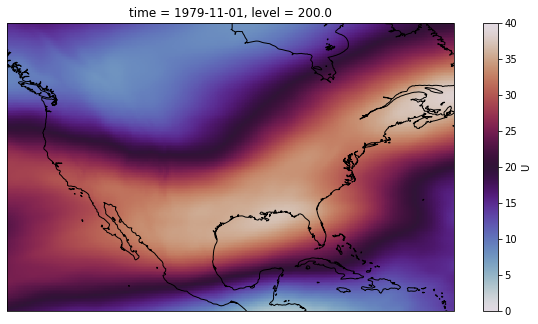

In [26]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)
ax = plt.axes([0., 0., 1., 1.], projection=ccrs.PlateCarree())
p = ds3monthly["U"].isel(time=10).plot(ax = ax, cmap="twilight",vmin=0, vmax=40, transform=ccrs.PlateCarree())
ax.coastlines()
ax.margins(x=0, y=0)
plt.show()

In [27]:
ds3monthly.to_netcdf(f"/glade/scratch/kiarar/ERA5_U_winds_200_1979_2018.nc")

In [28]:
ds3monthly=None
ds3=None

In [29]:
ds3monthly

### U Winds (200 hPa) 19750-1978 Data 

In [39]:
data4 = '/gpfs/fs1/collections/rda/data/ds633.4/e5p.oper.an.pl/1962*/e5p.oper.an.pl.128_131_u.ll025uv.*.nc'

In [40]:
ds4 = xr.open_mfdataset(data4, parallel=True)

In [41]:
ds4 = ds4.where((ds4["longitude"]>=firstlon)&(ds4["longitude"]<=secondlon)&(ds4["latitude"]>=firstlat)&(ds4["latitude"]<=secondlat),drop=True)

/glade/u/home/kiarar/.conda/envs/python_tutorial/lib/python3.9/site-packages/xarray/core/indexing.py:1387: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]


In [42]:
# Select 200hPa level
ds4 = ds4.sel(level=200)

In [43]:
ds4monthly = ds4.resample(time='MS').mean(skipna=True).compute()

distributed.utils - ERROR - 
Traceback (most recent call last):
  File "/glade/u/home/kiarar/.conda/envs/python_tutorial/lib/python3.9/site-packages/distributed/utils.py", line 671, in log_errors
    yield
  File "/glade/u/home/kiarar/.conda/envs/python_tutorial/lib/python3.9/site-packages/distributed/scheduler.py", line 6229, in retire_workers
    await self.replicate(
  File "/glade/u/home/kiarar/.conda/envs/python_tutorial/lib/python3.9/site-packages/distributed/scheduler.py", line 5976, in replicate
    assert count > 0
AssertionError
distributed.core - ERROR - Exception while handling op retire_workers
Traceback (most recent call last):
  File "/glade/u/home/kiarar/.conda/envs/python_tutorial/lib/python3.9/site-packages/distributed/core.py", line 498, in handle_comm
    result = await result
  File "/glade/u/home/kiarar/.conda/envs/python_tutorial/lib/python3.9/site-packages/distributed/scheduler.py", line 6229, in retire_workers
    await self.replicate(
  File "/glade/u/home/kia

Traceback (most recent call last):
  File "/glade/u/home/kiarar/.conda/envs/python_tutorial/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-43-cf27c75359ef>", line 1, in <module>
    ds4monthly = ds4.resample(time='MS').mean(skipna=True).compute()
  File "/glade/u/home/kiarar/.conda/envs/python_tutorial/lib/python3.9/site-packages/xarray/core/dataset.py", line 1018, in compute
    return new.load(**kwargs)
  File "/glade/u/home/kiarar/.conda/envs/python_tutorial/lib/python3.9/site-packages/xarray/core/dataset.py", line 852, in load
    evaluated_data = da.compute(*lazy_data.values(), **kwargs)
  File "/glade/u/home/kiarar/.conda/envs/python_tutorial/lib/python3.9/site-packages/dask/base.py", line 567, in compute
    results = schedule(dsk, keys, **kwargs)
  File "/glade/u/home/kiarar/.conda/envs/python_tutorial/lib/python3.9/site-packages/distributed/client.py", line 2673,

TypeError: object of type 'NoneType' has no len()

In [ ]:
ds4monthly

In [ ]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)
ax = plt.axes([0., 0., 1., 1.], projection=ccrs.PlateCarree())
p = ds4monthly["U"].isel(time=10).plot(ax = ax, cmap="twilight", transform=ccrs.PlateCarree())
ax.coastlines()
ax.margins(x=0, y=0)
plt.show()

In [ ]:
ds4monthly.to_netcdf("/glade/scratch/kiarar/ERA5_U_winds_200_1961.nc")

In [ ]:
ds4monthly=None
ds4=None

In [ ]:
ds4monthly

### V Winds (200 hPa) 1979-2018 Data

In [9]:
data5 = '/gpfs/fs1/collections/rda/data/ds633.1/e5.moda.an.pl/*/e5.moda.an.pl.128_132_v.ll025uv.*.nc'

In [10]:
ds5 = xr.open_mfdataset(data5, parallel=True)

In [11]:
ds5 = ds5.where((ds5["longitude"]>=firstlon)&(ds5["longitude"]<=secondlon)&(ds5["latitude"]>=firstlat)&(ds5["latitude"]<=secondlat),drop=True)

/glade/u/home/kiarar/.conda/envs/python_tutorial/lib/python3.9/site-packages/xarray/core/indexing.py:1387: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]


In [12]:
ds5

<xarray.Dataset>
Dimensions:    (latitude: 181, level: 37, longitude: 281, time: 480)
Coordinates:
  * latitude   (latitude) float64 60.0 59.75 59.5 59.25 ... 15.5 15.25 15.0
  * level      (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
  * longitude  (longitude) float64 230.0 230.2 230.5 230.8 ... 299.5 299.8 300.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
Data variables:
    V          (time, level, latitude, longitude) float32 dask.array<chunksize=(12, 37, 181, 281), meta=np.ndarray>
    utc_date   (time, longitude, latitude) float64 dask.array<chunksize=(12, 281, 181), meta=np.ndarray>
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB 1 data to netC...
    NETCDF_VERSION:       4.6.1
    CONVERSION_PLATFORM:  Linux casper04 3.10.0-693.21.1.el7.x86_64 #1 SMP We...
    CONVERSION_DATE:      Fri Nov  8 18:05:13 MST 2019
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Fri Nov  8 18:05:28 2019: ncks -4 --ppc default=7 e...
    NCO:                  netCDF Operators version 4.7.9 (Homepage = http://n...

In [13]:
# Select 200hPa level
ds5 = ds5.sel(level=200)

In [14]:
ds5monthly = ds5.resample(time='MS').mean(skipna=True).compute()

distributed.scheduler - ERROR - Couldn't gather keys {"('concatenate-cf1c04f611958391d3c80ee016a53d67', 382, 0, 0)": [], "('concatenate-cf1c04f611958391d3c80ee016a53d67', 383, 0, 0)": []} state: ['waiting', 'waiting'] workers: []
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: [], ('concatenate-cf1c04f611958391d3c80ee016a53d67', 382, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: [], ('concatenate-cf1c04f611958391d3c80ee016a53d67', 383, 0, 0)
NoneType: None


In [15]:
ds5monthly

<xarray.Dataset>
Dimensions:    (latitude: 181, longitude: 281, time: 480)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
  * latitude   (latitude) float64 60.0 59.75 59.5 59.25 ... 15.5 15.25 15.0
    level      float64 200.0
  * longitude  (longitude) float64 230.0 230.2 230.5 230.8 ... 299.5 299.8 300.0
Data variables:
    V          (time, latitude, longitude) float32 -6.403 -6.525 ... -4.186
    utc_date   (time, longitude, latitude) float64 1.979e+09 ... 2.018e+09

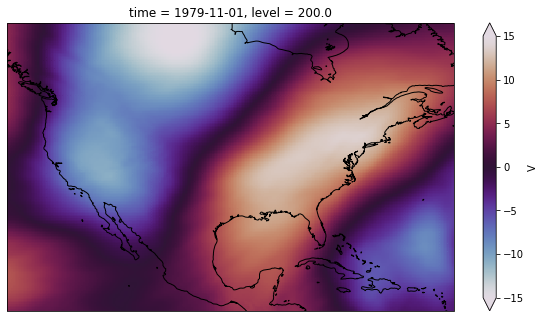

In [16]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)
ax = plt.axes([0., 0., 1., 1.], projection=ccrs.PlateCarree())
p = ds5monthly["V"].isel(time=10).plot(ax = ax, cmap="twilight",vmin=15, vmax=-15, transform=ccrs.PlateCarree())
ax.coastlines()
ax.margins(x=0, y=0)
plt.show()

In [17]:
ds5monthly.to_netcdf("/glade/scratch/kiarar/ERA5_V_winds_200_1979_2018.nc")

In [18]:
ds5monthly=None
ds5=None

In [19]:
ds5monthly

### V Winds (200 hPa) 1950-1978 Data

In [ ]:
data6 = '/gpfs/fs1/collections/rda/data/ds633.4/e5p.oper.an.pl/*/e5p.oper.an.pl.128_131_u.ll025uv.*.nc'

In [ ]:
ds6 = xr.open_mfdataset(data6, parallel=True)

In [ ]:
ds6 = ds6.where((ds6["longitude"]>=firstlon)&(ds6["longitude"]<=secondlon)&(ds6["latitude"]>=firstlat)&(ds6["latitude"]<=secondlat),drop=True)

In [ ]:
ds6

In [ ]:
# Select 200hPa level
ds6 = ds6.sel(level=200)

In [ ]:
ds6monthly = ds6.resample(time='MS').mean(skipna=True).compute()

In [ ]:
ds6monthly

In [ ]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)
ax = plt.axes([0., 0., 1., 1.], projection=ccrs.PlateCarree())
p = ds6monthly["U"].isel(time=10).plot(ax = ax, cmap="twilight",vmin=255, vmax=300, transform=ccrs.PlateCarree())
ax.coastlines()
ax.margins(x=0, y=0)
plt.show()

In [ ]:
ds6monthly.to_netcdf("/glade/scratch/kiarar/ERA5_V_winds_200_1950_1978.nc")

### 500 hPa 1979-2018 Geopotential Data

In [9]:
data7 = '/gpfs/fs1/collections/rda/data/ds633.1/e5.moda.an.pl/*/e5.moda.an.pl.128_129_z.ll025sc.*.nc'

In [10]:
ds7 = xr.open_mfdataset(data7, parallel=True)

In [11]:
ds7 = ds7.where((ds7["longitude"]>=firstlon)&(ds7["longitude"]<=secondlon)&(ds7["latitude"]>=firstlat)&(ds7["latitude"]<=secondlat),drop=True)

/glade/u/home/kiarar/.conda/envs/python_tutorial/lib/python3.9/site-packages/xarray/core/indexing.py:1387: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]


In [12]:
ds7

<xarray.Dataset>
Dimensions:    (latitude: 181, level: 37, longitude: 281, time: 480)
Coordinates:
  * latitude   (latitude) float64 60.0 59.75 59.5 59.25 ... 15.5 15.25 15.0
  * level      (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
  * longitude  (longitude) float64 230.0 230.2 230.5 230.8 ... 299.5 299.8 300.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
Data variables:
    Z          (time, level, latitude, longitude) float32 dask.array<chunksize=(12, 37, 181, 281), meta=np.ndarray>
    utc_date   (time, longitude, latitude) float64 dask.array<chunksize=(12, 281, 181), meta=np.ndarray>
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB 1 data to netC...
    NETCDF_VERSION:       4.6.1
    CONVERSION_PLATFORM:  Linux casper04 3.10.0-693.21.1.el7.x86_64 #1 SMP We...
    CONVERSION_DATE:      Fri Nov  8 18:00:58 MST 2019
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Fri Nov  8 18:01:09 2019: ncks -4 --ppc default=7 e...
    NCO:                  netCDF Operators version 4.7.9 (Homepage = http://n...

In [13]:
ds7 = ds7.sel(level=500)

In [14]:
ds7

<xarray.Dataset>
Dimensions:    (latitude: 181, longitude: 281, time: 480)
Coordinates:
  * latitude   (latitude) float64 60.0 59.75 59.5 59.25 ... 15.5 15.25 15.0
    level      float64 500.0
  * longitude  (longitude) float64 230.0 230.2 230.5 230.8 ... 299.5 299.8 300.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
Data variables:
    Z          (time, latitude, longitude) float32 dask.array<chunksize=(12, 181, 281), meta=np.ndarray>
    utc_date   (time, longitude, latitude) float64 dask.array<chunksize=(12, 281, 181), meta=np.ndarray>
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB 1 data to netC...
    NETCDF_VERSION:       4.6.1
    CONVERSION_PLATFORM:  Linux casper04 3.10.0-693.21.1.el7.x86_64 #1 SMP We...
    CONVERSION_DATE:      Fri Nov  8 18:00:58 MST 2019
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Fri Nov  8 18:01:09 2019: ncks -4 --ppc default=7 e...
    NCO:                  netCDF Operators version 4.7.9 (Homepage = http://n...

In [15]:
ds7monthly = ds7["Z"].resample(time='MS').mean(skipna=True).compute()

distributed.scheduler - ERROR - Couldn't gather keys {"('stack-43c393a1e8a496e01d0521b942504dc0', 107, 0, 0)": [], "('stack-43c393a1e8a496e01d0521b942504dc0', 355, 0, 0)": [], "('stack-43c393a1e8a496e01d0521b942504dc0', 358, 0, 0)": [], "('stack-43c393a1e8a496e01d0521b942504dc0', 98, 0, 0)": [], "('stack-43c393a1e8a496e01d0521b942504dc0', 100, 0, 0)": [], "('stack-43c393a1e8a496e01d0521b942504dc0', 99, 0, 0)": [], "('stack-43c393a1e8a496e01d0521b942504dc0', 353, 0, 0)": [], "('stack-43c393a1e8a496e01d0521b942504dc0', 350, 0, 0)": [], "('stack-43c393a1e8a496e01d0521b942504dc0', 352, 0, 0)": [], "('stack-43c393a1e8a496e01d0521b942504dc0', 105, 0, 0)": [], "('stack-43c393a1e8a496e01d0521b942504dc0', 359, 0, 0)": [], "('stack-43c393a1e8a496e01d0521b942504dc0', 348, 0, 0)": [], "('stack-43c393a1e8a496e01d0521b942504dc0', 101, 0, 0)": [], "('stack-43c393a1e8a496e01d0521b942504dc0', 351, 0, 0)": [], "('stack-43c393a1e8a496e01d0521b942504dc0', 354, 0, 0)": [], "('stack-43c393a1e8a496e01d0521b9

In [16]:
ds7monthly

<xarray.DataArray 'Z' (time: 480, latitude: 181, longitude: 281)>
array([[[52646.125, 52640.875, 52638.125, ..., 51085.125, 51096.375,
         51108.375],
        [52667.875, 52662.625, 52661.375, ..., 51100.375, 51111.375,
         51123.125],
        [52690.375, 52684.625, 52683.125, ..., 51116.375, 51127.375,
         51139.125],
        ...,
        [57080.125, 57082.125, 57083.875, ..., 57351.625, 57345.125,
         57340.375],
        [57090.875, 57092.875, 57094.125, ..., 57353.625, 57348.375,
         57342.375],
        [57101.125, 57102.875, 57103.875, ..., 57354.875, 57350.875,
         57344.625]],

       [[51070.477, 51070.477, 51072.727, ..., 50525.227, 50534.727,
         50544.977],
        [51093.477, 51094.477, 51099.227, ..., 50539.227, 50547.977,
         50557.477],
        [51117.977, 51118.477, 51123.977, ..., 50552.727, 50560.727,
         50569.227],
...
        [57560.05 , 57560.05 , 57559.8  , ..., 57643.05 , 57642.8  ,
         57644.3  ],
        [57562.55 , 57562.55 , 57562.3  , ..., 57641.55 , 57642.05 ,
         57641.8  ],
        [57565.05 , 57564.8  , 57564.3  , ..., 57639.3  , 57640.55 ,
         57640.05 ]],

       [[52296.84 , 52300.59 , 52305.84 , ..., 50945.59 , 50957.59 ,
         50969.84 ],
        [52323.09 , 52327.59 , 52334.59 , ..., 50955.34 , 50966.34 ,
         50978.09 ],
        [52349.84 , 52353.84 , 52360.84 , ..., 50965.84 , 50976.34 ,
         50987.34 ],
        ...,
        [57408.34 , 57410.34 , 57411.84 , ..., 57695.59 , 57693.34 ,
         57692.34 ],
        [57412.34 , 57414.34 , 57416.09 , ..., 57689.09 , 57687.84 ,
         57685.34 ],
        [57416.34 , 57418.34 , 57420.09 , ..., 57682.09 , 57681.84 ,
         57679.09 ]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
  * latitude   (latitude) float64 60.0 59.75 59.5 59.25 ... 15.5 15.25 15.0
    level      float64 500.0
  * longitude  (longitude) float64 230.0 230.2 230.5 230.8 ... 299.5 299.8 300.0

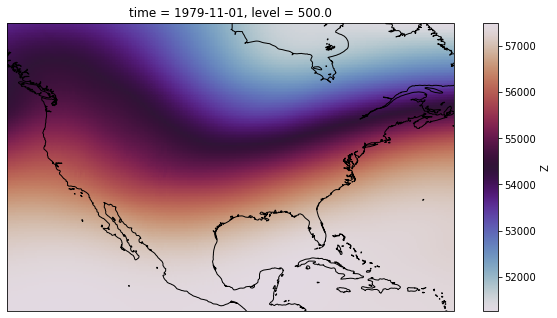

In [19]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)
ax = plt.axes([0., 0., 1., 1.], projection=ccrs.PlateCarree())
p = ds7monthly.isel(time=10).plot(ax = ax, cmap="twilight", transform=ccrs.PlateCarree())
ax.coastlines()
ax.margins(x=0, y=0)
plt.show()

In [20]:
ds7monthly.to_netcdf("/glade/scratch/kiarar/ERA5_geopotential_winds_500_1979_2018.nc")

In [21]:
ds7monthly=None
ds=None

In [22]:
ds7monthly

### 500 hPa 1950-1978 data

In [ ]:
data8 = '/gpfs/fs1/collections/rda/data/ds633.4/e5p.oper.an.pl/*/e5p.oper.an.pl.128_129_z.ll025sc.*.nc'

In [ ]:
ds8 = xr.open_mfdataset(data8, parallel=True)

In [ ]:
ds8 = ds8.where((ds8["longitude"]>=firstlon)&(ds8["longitude"]<=secondlon)&(ds8["latitude"]>=firstlat)&(ds8["latitude"]<=secondlat),drop=True)

In [ ]:
ds8

In [ ]:
ds8monthly = ds8.resample(time='MS').mean(skipna=True).compute()

In [ ]:
ds8monthly

In [ ]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)
ax = plt.axes([0., 0., 1., 1.], projection=ccrs.PlateCarree())
p = ds8monthly["U"].isel(time=10).plot(ax = ax, cmap="twilight",vmin=255, vmax=300, transform=ccrs.PlateCarree())
ax.coastlines()
ax.margins(x=0, y=0)
plt.show()

In [ ]:
ds8monthly.to_netcdf("/glade/scratch/kiarar/ERA5_geopotential_winds_500_1950_1978.nc")